## Decision Trees

+ Consider the example for medical drug recommendation, checking the Image below.
> + We start with the Age, which can be Young, Middle-aged, or Senior. 
> + If the patient is Middle-aged, then we’ll definitely go for Drug B. 
> + On the other hand, if he is a Young or a Senior patient, we’ll need more details to help us determine which drug to prescribe. 
> + The additional decision variables can be things such as Cholesterol levels, Gender or Blood Pressure. 
> + Assume the patient is Young. If the patient is Female, then we will recommend Drug A, but if the patient is Male, then we’ll go for Drug B. 
+ Decision trees are about testing an attribute and branching the cases, based on the result of the test.
+ Each internal node corresponds to a test. And each branch corresponds to a result of the test. And each leaf node assigns a patient to a class.
+ A decision tree can be constructed by considering the attributes one by one.
+ First, choose an attribute from our dataset.
+ Calculate the significance of the attribute in the splitting of the data.
+ Next, split the data based on the value of the best attribute.
+ Then, go to each branch and repeat it for the rest of the attributes.
+ After building this tree, you can use it to predict the class of unknown cases or, in our case, the proper Drug for a new patient based on his/her characterestics.

In [4]:
UserPath = "/home/cerbero/Documents/edX/IBM Data Science/IBM ML0101EN/"

InputPath = UserPath+"00/"
OutputPath = UserPath+"03/"

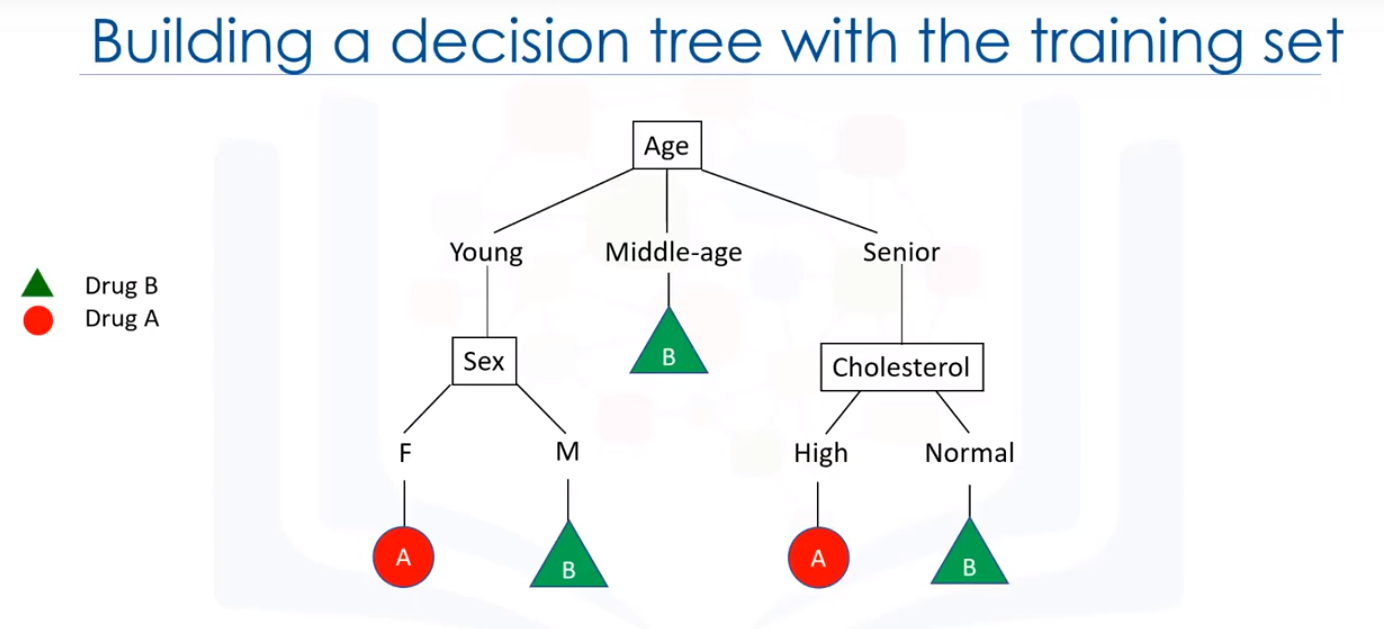

In [5]:
from IPython.display import Image 
Image(OutputPath+"Selection_046.png", retina=True)

## Creating Decision Trees

### Recursive Partitioning; Impurity

+ Decision trees are built using recursive partitioning to classify the data. Check the Image.
+ First, the model chooses the most predictive feature to first split the data.
+ Try with Cholesterol levels, then Sex, then Age
+  We can say the “Sex” attribute is more significant than “Cholesterol,” or in other words, it’s more predictive than the other attributes. Indeed, “predictiveness” is based on decrease in “impurity” of nodes.
+ We go another step down the tree and test attributes; for Male patients, "Cholesterol" reduces the impurity.

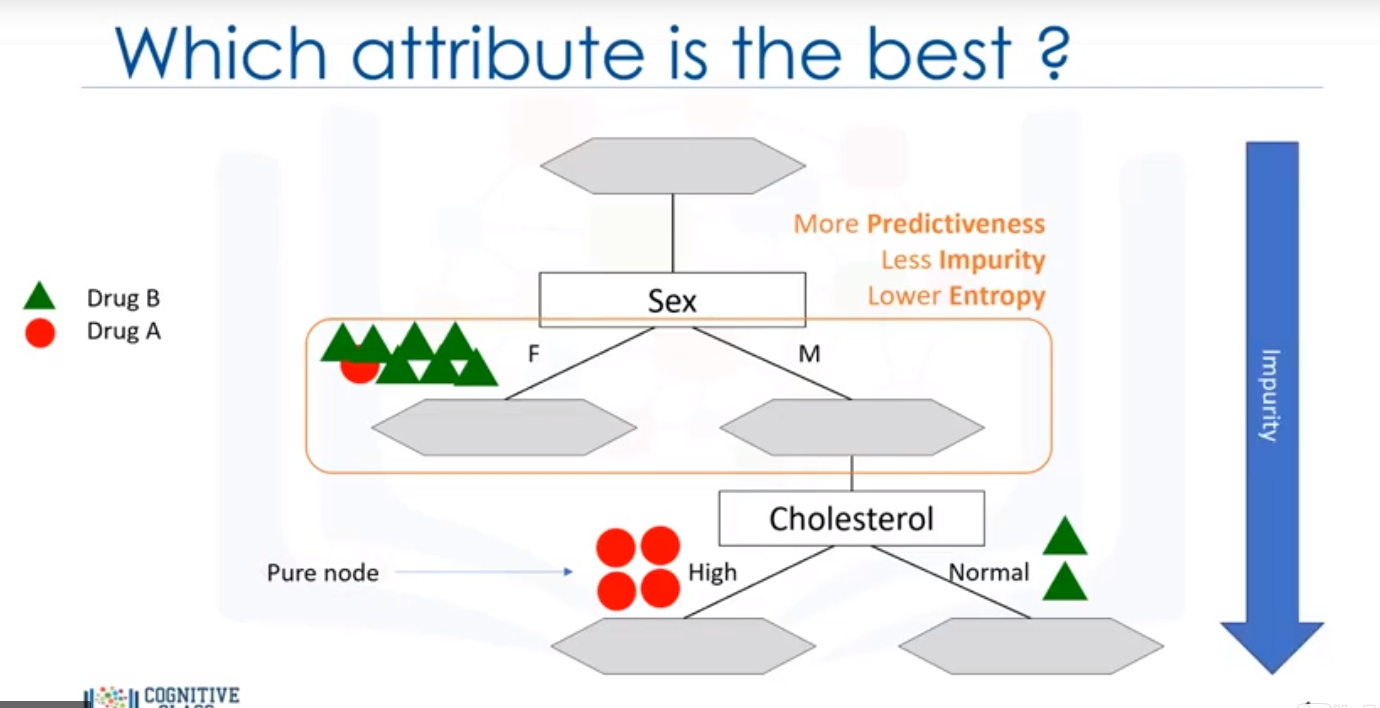

In [6]:
Image(OutputPath+"Selection_047.png", retina=True)

### Entropy; Information Gain

+ **Entropy** is the amount of uncertainty or randomness in the node. See the top Image below.
+ If the samples are completely homogeneous the entropy is zero and if the samples are equally divided, it has an entropy of one.
+ If all the data in a node are either Drug A or Drug B, then the entropy is zero, but if half of the data are Drug A and other half are B, then the entropy is one.
+ The entropy of each node allows the algorithm to compute the **Information Gain** vertically across nodes. Information Gain is a mere weighted average of the decrease in entropy. See the bottom Image below. 

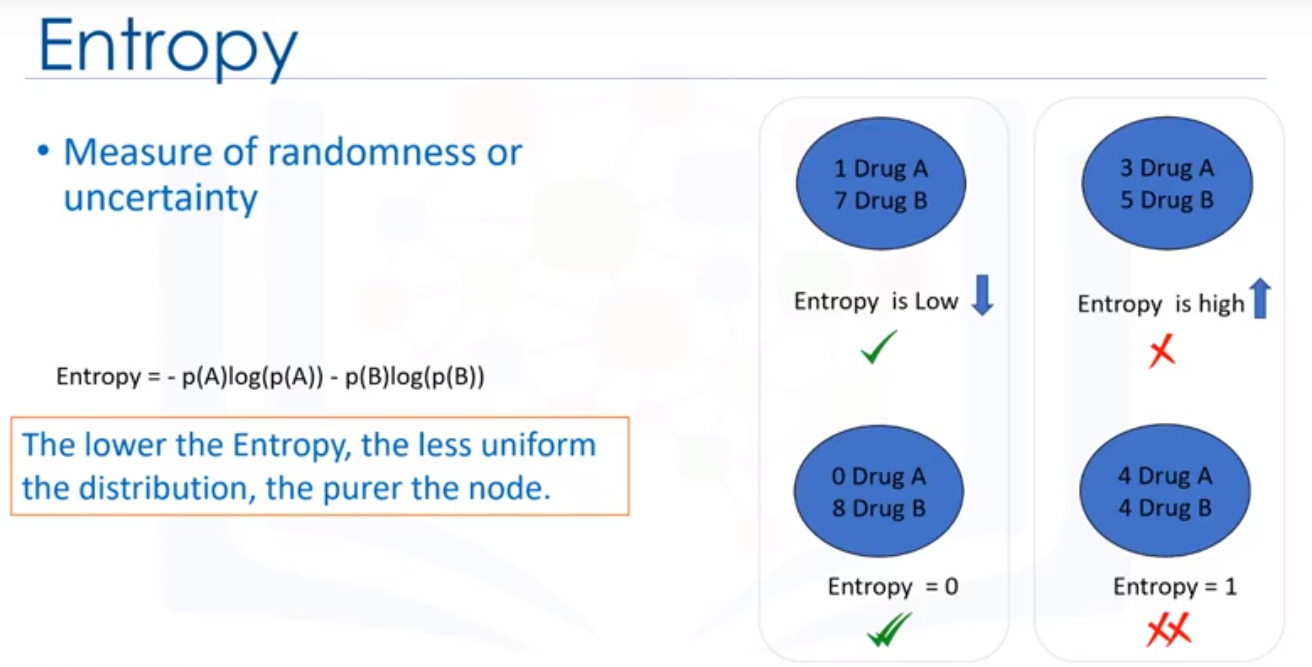

In [7]:
Image(OutputPath+"Selection_048.png", retina=True)

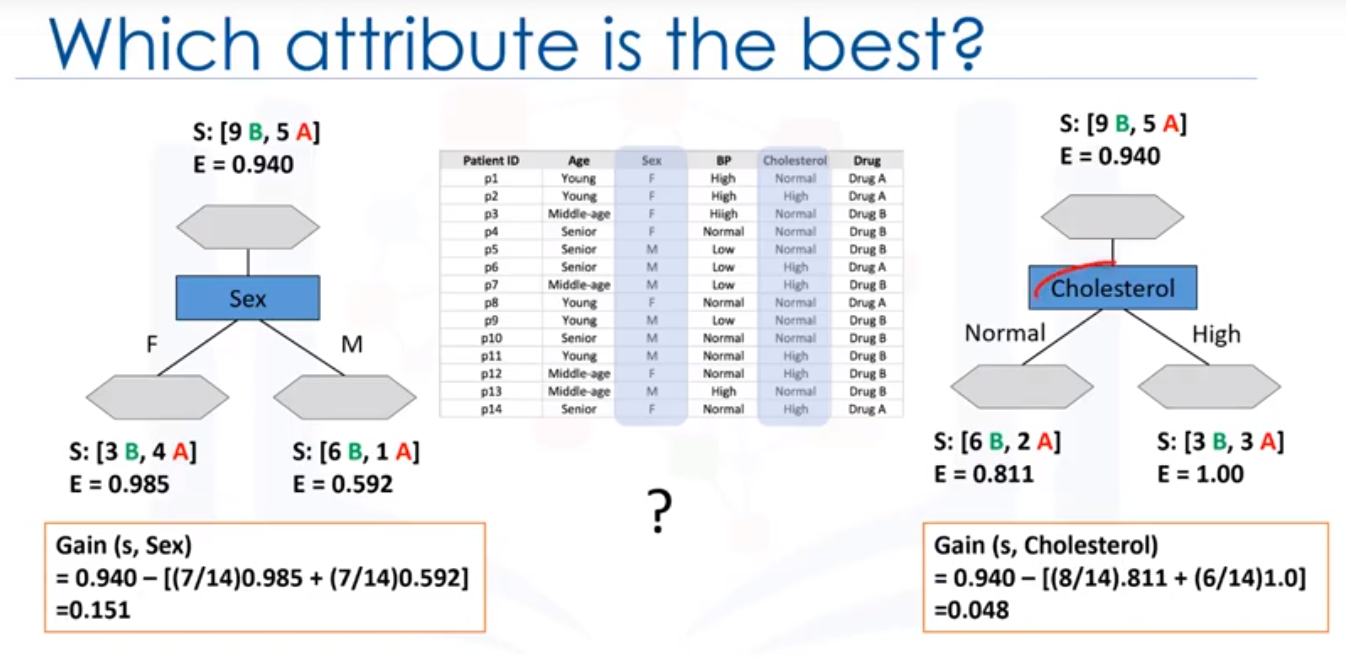

In [8]:
Image(OutputPath+"Selection_050.png", retina=True)

In [9]:
#We start the Lab hereon
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [10]:
#data from https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
my_data = pd.read_csv(InputPath+"drug200.csv", delimiter=",")
my_data[0:5]


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [11]:
my_data.shape

(200, 6)

In [12]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [13]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

#could also have used pandas.get_dummies()

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [14]:
#target variable
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [15]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [16]:
X_trainset.shape,y_trainset.shape

((140, 5), (140,))

In [17]:
X_testset.shape,y_testset.shape

((60, 5), (60,))

In [18]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
predTree = drugTree.predict(X_testset)

In [21]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


In [23]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

/home/cerbero/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


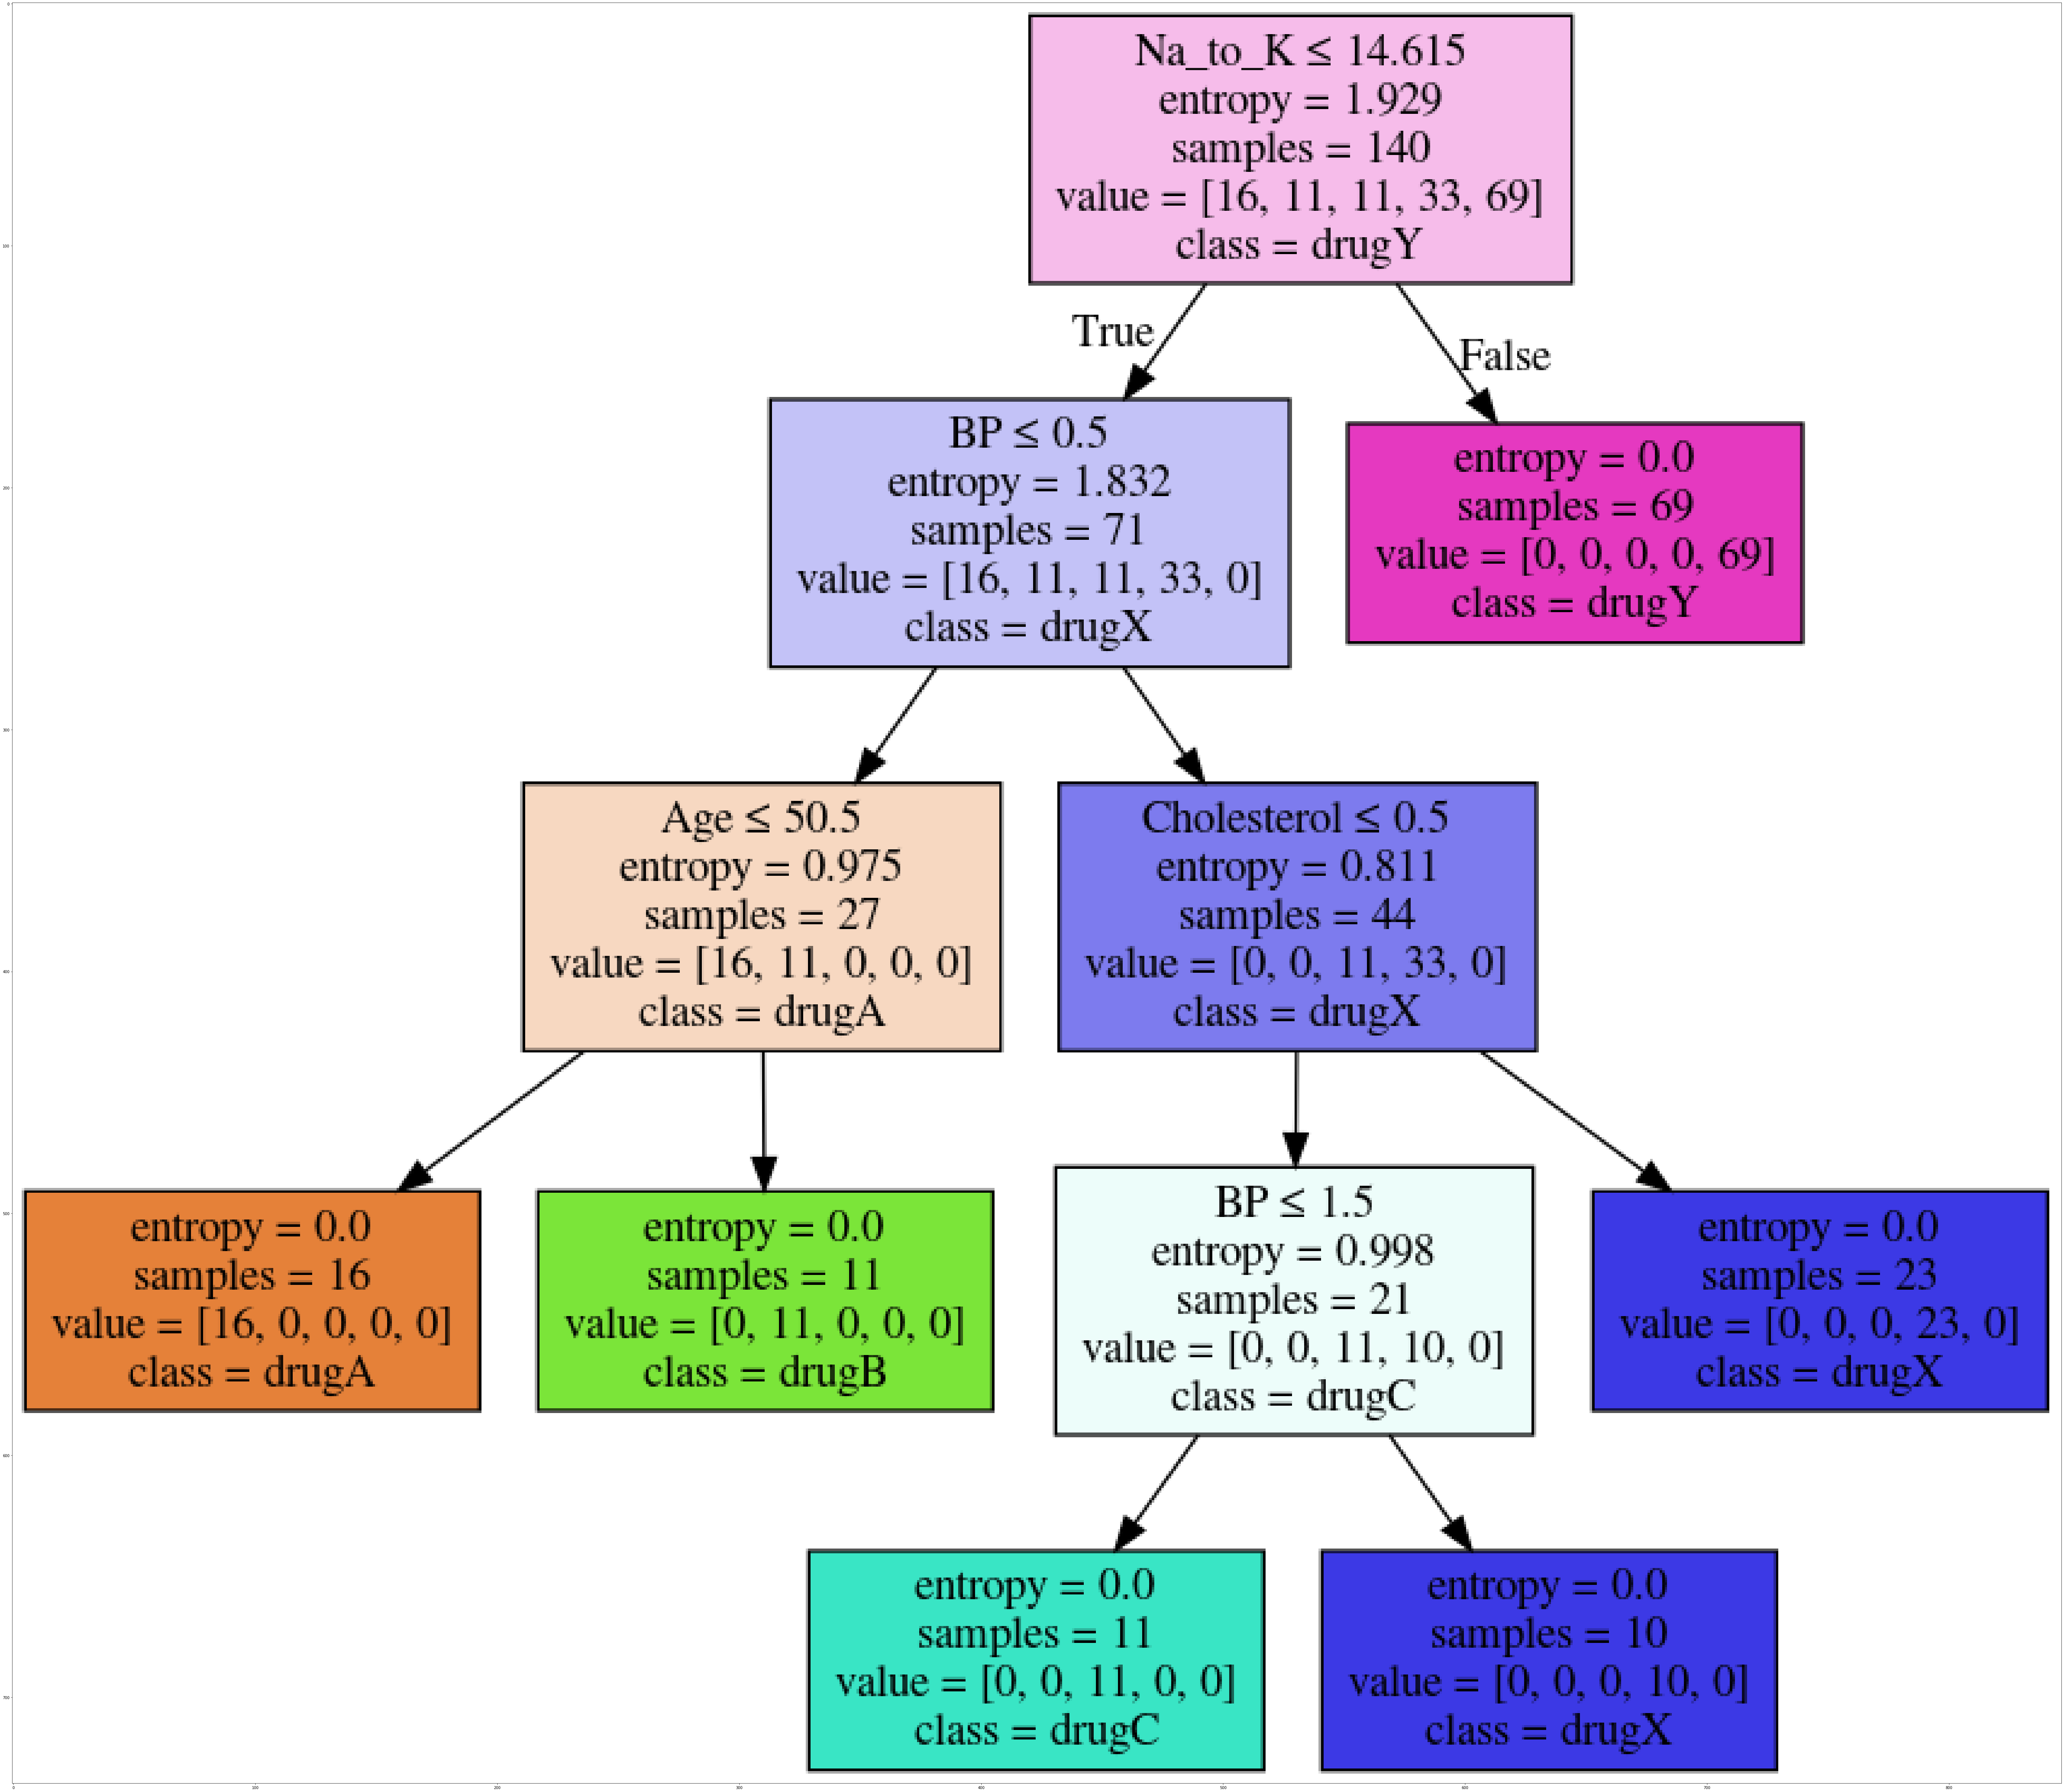

In [28]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.savefig(OutputPath+"Medical Drug Classification Tree.png")